# Introduction to `scipy` and standard library

This Notebook provides an overview of the capabilities of the `scipy` module and of the standard library. It covers Sect. IV and V of [Modules_in__python.ipynb](Modules_in__python.ipynb). 

## Table of Content

- [IV. Scipy](#IV)
    * IV.1: [Overview](#IV.1-Overview--)
        - Special functions: `scipy.special`
        - Linear algebra: `scipy.linalg`
        - Statistics and random numbers: `scipy.stats` 
        - Fast fourier transform: `scipy.fftpack`
        - interpolation: `scipy.interpolate`
        - physical constants: `scipy.constants`
        - numerical integration: `scipy.integrate`
    * IV.2 [Function minimization and fitting](#IV.2-Function-minimization-and-fitting:-scipy.optimize----): `scipy.optimize`
- [V. The standard library](#V): to manage directories, command lines, execute external programs, ... 
    * [Operating system functionalities ](#os:-operating-system-functionality): `os` 
    * [Running external commands](#subprocess:-running-an-external-command): `subprocess`
    * [System specific information](#sys:-system-specific-information) `sys`  
- [VI. References and supplementary material](#VI)

## IV. `scipy`  <a class="anchor" id="IV"></a>

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

`scipy` can be compared to other standard scientific-computing libraries, such as the GSL (GNU Scientific Library for C and C++), or Matlab’s toolboxes. scipy is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.

Before implementing a routine, it is worth checking if the desired data processing is not already implemented in Scipy. As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. By contrast, Scipy‘s routines are optimized and tested, and should therefore be used when possible.

We will NOT cover in details all the scipy capabilities/routines as this would be quite boring. We will briefly give an overview of some of them such that you know this exists ! We will also make use of several scipy functions in the future classes. 

#### IV.1 Overview  <a class="anchor" id="IV.1"></a>

- *Special functions*: `scipy.special` 
Special functions are transcendental functions. Help is quite clearly written. Frequently used ones are:
    * Bessel function, such as `scipy.special.jn()` (nth integer order Bessel function)
    * Elliptic function (`scipy.special.ellipj()` for the Jacobian elliptic function, ...)
    * Gamma function: `scipy.special.gamma()`, also note `scipy.special.gammaln()` which will give the log of Gamma to a higher numerical precision.
    * Erf, the area under a Gaussian curve: `scipy.special.erf()`
   

[[<matplotlib.lines.Line2D at 0x7ffe28449810>],

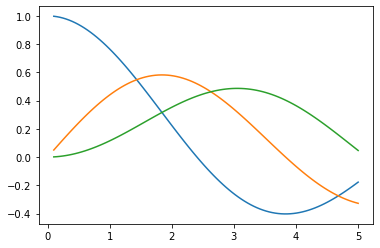

In [1]:
x1, x2 = 3, 4.
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
z = np.linspace(0.1, 5, 100)
special.jn(x1, x2)
[plt.plot(z, special.jn(i, z)) for i in range(3)]

- *Linear algebra operations*: `scipy.linalg`
The scipy.linalg module provides standard linear algebra operations. This allows you to calculate the inverse (`scipy.linalg.inv()`), determinant (`scipy.linalg.det()`), of a square matrix. Note also that `numpy` also implements some operations on matrices (and beware: product of 2 numpy arrays is not a matrix product): 
    * `a.dot(b)` is the matrix product of a and b. If a, and b are 1-D vector then this is the scalar product (also called inner product) of the 2 vectors. 
    * `np.eye(2)` creates a diagonal matrix of 2x2 with 1 along the diagonal; 
    * `np.diag(a)` extracts the diagonal elements of matrix a. 
    * `np.cross(a,b)`: cross product of 2 vectors
    * see http://www.python-course.eu/matrix_arithmetic.php for a didactic overview of matrix arithmetic with numpy. 
    

In [2]:
import scipy.linalg as linalg
import numpy as np

In [3]:
a = 4. * np.eye(2) 
a

array([[4., 0.],
       [0., 4.]])

In [4]:
a[1,0]= 2.
a

array([[4., 0.],
       [2., 4.]])

In [5]:
np.diag(a)

array([4., 4.])

In [6]:
b = np.linspace(0, 10, 4).reshape(2,2)
b

array([[ 0.        ,  3.33333333],
       [ 6.66666667, 10.        ]])

In [7]:
np.diag(b)

array([ 0., 10.])

In [8]:
a = 4.*np.eye(2) 
linalg.det(a)

16.0

In [9]:
linalg.det(linalg.inv(a))

0.0625

In [10]:
linalg.inv(b).dot(b)

array([[ 1.00000000e+00, -5.55111512e-17],
       [ 0.00000000e+00,  1.00000000e+00]])

- *Statistics and random numbers*: `scipy.stats`   
The module `scipy.stats` contains statistical tools and probabilistic descriptions of random processes. We will use some of these tools in the next classes ! Note that random number generators for various random process can be found in `numpy.random`. *Beware* that there is also a package `random` that is a random variable generator, and it is **DIFFERENT** from `np.random` (some functions have the same name but do different things). For example, if you want to select k unique random elements from a population sequence, then use `random.sample()`, while `np.random.sample()` will return random floats in the half-open interval [0.0, 1.0[ ! . 
     

In [11]:
import scipy.stats as stats

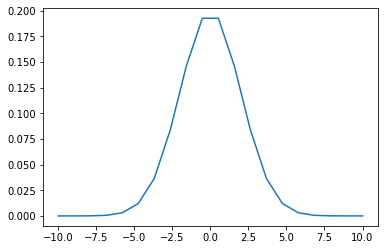

In [12]:
g = stats.norm(0, 2)
g.rvs(10)
x = np.linspace(-10,10, 20)
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(x, g.pdf(x))

- *Interpolation*: `scipy.interpolate`   
The `scipy.interpolate` is useful for fitting a function from experimental data and thus evaluating points where no measure exists. The module is based on the [FITPACK Fortran subroutines](http://www.netlib.org/dierckx/index.html) from the [netlib](http://www.netlib.org/) project. You may consult [this page](https://scipy.github.io/old-wiki/pages/Cookbook/Interpolation.html) and [this page](http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Gridding_irregularly_spaced_data) for some nice examples of use of this function. 
    

In [13]:
x_vec, y_vec = np.arange(5), np.linspace(0,5,3)
X, Y = np.meshgrid(x_vec, y_vec)

In [14]:
X

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [15]:
Y

array([[0. , 0. , 0. , 0. , 0. ],
       [2.5, 2.5, 2.5, 2.5, 2.5],
       [5. , 5. , 5. , 5. , 5. ]])

In [16]:
import scipy.interpolate as interpolate

In [17]:
%timeit np.arange(0,10)

460 ns ± 30.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


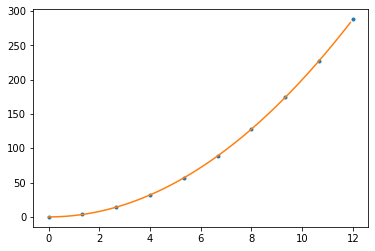

In [18]:
x = np.linspace(0,12,10)
y = 2.*x**2
x2 = np.arange(0,12,0.1)
f = interpolate.interp1d(x, y, kind='quadratic')
y2 = f(x2)
plt.plot(x, y, '.')
plt.plot(x2, y2 )

- *Pre-defined constants*: `scipy.constants`
Contains most of the "generic" physical constants (c, h, G, ...). In addition there is also 2014 CODATA recommended values [CODATA2014](https://docs.scipy.org/doc/scipy/reference/constants.html#codata2014). To access those (as well as their units and uncertainties)  `import scipy.constants.physical_constants`. See help and/or consult the [scipy.constants doc](https://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants) to consult the list. To access e.g. the speed of light:
``` python
import scipy.constants 
scipy.constants.c
    Out: 299792458.0
scipy.constants.physical_constants["Planck mass"]
    Out: (2.17647e-08, 'kg', 5.1e-13)
```
   

In [19]:
import scipy.constants 
scipy.constants.c

299792458.0

- *Routines for numerical integration*: `scipy.integrate()`
The most generic integration routine (quadrature) is `scipy.integrate.quad()`. Other integration schemes exist such as fixed-order Gaussian quadrature (`fixed_quad()`), or Romberg integration method (`romberg`). `scipy.integrate` also features routines for integrating Ordinary Differential Equations (ODE). In particular, `scipy.integrate.odeint()` is a general-purpose integrator using LSODA (Livermore Solver for Ordinary Differential equations with Automatic method switching for stiff and non-stiff problems), see the [ODEPACK Fortran library](http://people.sc.fsu.edu/~jburkardt/f77_src/odepack/odepack.html) for more details. You can find a few examples in the [scipy lecture notes](http://www.scipy-lectures.org/intro/scipy.html#numerical-integration-scipy-integrate). 

In [20]:
from scipy.integrate import quad
res, err = quad(np.sin, -np.pi/2., np.pi/2.)
np.allclose(res, 0., atol=1.e-2)

True

-  *File input/output*: `scipy.io` and `scipy.misc`
This allows you to read some specific file formats generated by other programs such as MATLAB(R) (`scipy.io.loadmat`, `scipy.io.savemat`), idl (`scipy.io.idl`), or unformatted sequential files from Fortran code.   
Prior to `scipy 1.0` there was also a function to read images (`png`), with `scipy.misc.imread`, but this is deprecated since 1.0.0. Now, one should use `imageio` to transform a png into a numpy array. 
``` python 
from scipy import misc
misc.imread('fname.png')    
    Out: array(...)
# Matplotlib also has a similar function
import matplotlib.pyplot as plt
plt.imread('fname.png')    
    Out: array(...)
```

Note: MATLAB(R) is a registered trademark of The MathWorks, Inc., 3 Apple Hill
Drive, Natick, MA 01760-2098, USA.

In [22]:
import imageio
test = imageio.imread('../Figures/numpy_indexing.png')

In [23]:
test.shape

(457, 801, 4)

- *Fast Fourier Transforms*: `scipy.fftpack()`

The `scipy.fftpack` module allows one to compute fast Fourier transforms. 

In [24]:
import random
import numpy as np

In [25]:
np.random.normal()

1.314392056129651

In [26]:
time_step = 0.01
period = 2.
time_vec = np.arange(0, 20, time_step)
x = 2 * np.pi / period * time_vec
signal = np.sin(x) + 0.5 * np.random.randn(time_vec.size)

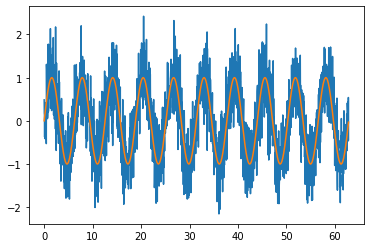

In [27]:
plt.plot(x, signal)
plt.plot(x, np.sin(x))

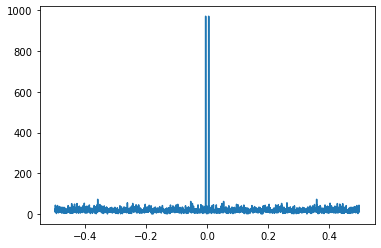

In [28]:
from scipy import fftpack
sig_fft = fftpack.fft(signal) 
freqs = fftpack.fftfreq(signal.size) 
power = np.abs(sig_fft)
plt.plot(freqs, power)  # remind that sig_fft is of complex dtype

In [29]:
np.argmax(power), 
print('Period is %.2f ' % (time_step / freqs[np.argmax(power)] ))   

Period is 2.00 


#### IV.2 Function minimization and fitting: `scipy.optimize`    <a class="anchor" id="IV.2"></a>

This section provides a brief introduction to optimization capabilities of `scipy` and can be ignored in the context of the SPAT0002 lecture. This topic will be covered more extensively in the Lecture dedicated to [frequentist inference and Maximum Likelihood Estimation](05-MLE_and_regression/MLE.ipynb). 

Optimization of a function is an important aspect of many data analysis problems. The `scipy.optimize` module provides useful algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding. 

We will focus here on one of the most used application of minimization techniques which is $\chi^2$ minimization, namely curve fitting. As you know, curve fitting consists in minimizing the *weighted sum of the squared residuals* (i.e. residuals being the difference between the model and the data):    
$\chi^2 = \sum_{i=1}^{N} \left( \frac{y_i - f(x_i)}{\sigma_i} \right)^2$

While it is possible to define ourself a function that calculates the $\chi^2$ of a given model and use some of the functions implemented in `scipy.optimize` to solve this minimization problem, we can also directly use the convenience function `curve_fit()`, that already does it for us. This function implements the "Levenberg-Marquardt" algorithm to find the parameters that minimize your $\chi^2$ merit function. Conceptually, that method switch between the "Gradient Descent Method" (you perturb the parameters by some amount "h" in the direction of steepest descent in your $\chi^2$ function), and the "Gauss-Newton Method" that assumes that locally your function is quadratic in the parameters to determine "h", through a "lagrange parameter" lambda that is modified depending of the observed change in merit function. The `curve_fit()` function works like this:
``` python
# first create a function that defines your model
# It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.
def func(x, p1, p2, p3):
y = f(x, p1, p2, p3)  # replace f(x, p1, p2, p3) by a function of vector x with parameters p1, p2, p3
    return y
# Second we call curve_fit(), first three arguments being func, xdata, ydata. Next two are optional initial guess and errors on y. 
pfit, pcov = scipy.optimize.curve_fit(func, xdata, ydata, p0=x0, sigma=sigma) 
# there is the possibility to constrain the parameters to certain ranges using method = 'trf'
```
We can move to the next cell to see in details an example of curve fitting. 
Beware, the covariance matrix, that allows you to make a proper (i.e. statistically valid) uncertainty estimate on the fitted parameters, does only make sense in case of gaussian noise. 

**Note**: If you are not too familiar with curve fitting/least square minimization, how to do when you have errors also on the independant variable (namely x), about difference between linear and non linear least-square (i.e. applied to linear and non linear models), about the basic concept behind the least square fitting algorithm ... I advise you to consult [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) (Chapters 10, 15), and [Hogg, Bovy, Lang 2010](https://arxiv.org/abs/1008.4686). 

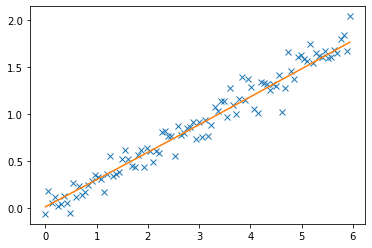

In [30]:
# Import the scipy.optimize module that contains the function curve_fit()
import scipy.optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Let's define a polynomial of order 2 as our model
def polynomial(x, p1, p2, p3):
    return p1 + p2*x + p3 * x**2

xdata = np.arange(0., 6., 0.06)
ydata = 0.3 * xdata + 0.1 * np.random.randn(len(xdata))
plt.plot(xdata, ydata, 'x')
# Create fake data: a line y = a + bx with a=0, b=0.3
xdata = np.arange(0., 6., 0.06)
ydata = 0.3 * xdata + 0.1 * np.random.randn(len(xdata))
sigma = np.zeros(len(xdata)) + 0.1
x0 = [0, 0, 0] # Define the initial parameters
pfit, pcov = scipy.optimize.curve_fit(polynomial, xdata, ydata, x0, sigma)
model = polynomial(xdata, pfit[0], pfit[1], pfit[2])
plt.plot(xdata, model)

In [31]:
# let's look to the most likely values of the parameters
print(['p[ %i ] = %.2f' %(i, pfit[i]) for i in np.arange(3)] )

# Let's also print the errors on the parameters based on the covariance matrix
print(['sigma[ %i ] = %.2f' %(i, np.sqrt(pcov[i, i])) for i in np.arange(3)] )

# We need to evaluate the chi^2 ourself
chi2 = sum( ( (ydata - model ) / sigma )**2 )
print('chi^2 = %.3f and reduced chi^2 = %.3f' %(chi2, chi2 / ( len(xdata) - 3.)))

['p[ 0 ] = 0.02', 'p[ 1 ] = 0.29', 'p[ 2 ] = 0.00']
['sigma[ 0 ] = 0.03', 'sigma[ 1 ] = 0.02', 'sigma[ 2 ] = 0.00']
chi^2 = 103.228 and reduced chi^2 = 1.064


Text(0, 0.5, 'data')

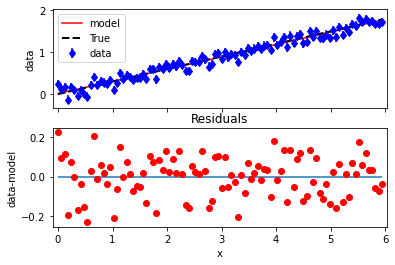

In [32]:
# Now we can visualize the results
residuals = ydata-model  # Calculate the residuals

# We create a window with 2 subplots
f, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

# In the top one, we plot the data, the model, the "true" value
ax[0].errorbar(xdata, ydata, yerr=sigma, ls='', marker='d', color='blue', label='data')
ax[0].plot(xdata, model, color='red', label='model')
ax[0].plot(xdata, 0.3 * xdata, lw=2,  ls='--', color='black', label='True')

# We plot residuals in the bottom one, as well as an horizontal line
ax[1].plot(xdata, residuals, 'o', color='red')
ax[1].hlines(0, np.min(xdata), np.max(xdata))

# We customize a bit more the plot
ax[1].set_title('Residuals')
ax[0].set_xlim(np.min(xdata)-0.1, np.max(xdata)+0.1)
ax[0].legend(loc='best')
ax[1].set_xlabel('x')
ax[1].set_ylabel('data-model')
ax[0].set_ylabel('data')

-6.469714153300999e-11 0.10160098982127061


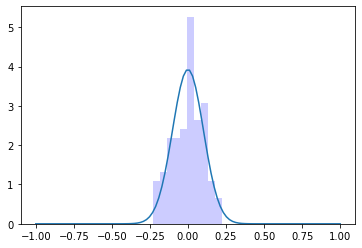

In [34]:
import scipy.stats
# Are the residuals Normally distributed ?
x = np.linspace(-1,1,100)
hist_resi = plt.hist(residuals, bins=10, color='blue', alpha=0.2, density=True)
# Note in the above line that we have used the option "normed = True" . 
# Consequently, the integral of the histogram will sum to 1. This is effectively a pdf.
fitpdf_mean, fitpdf_sigma = scipy.stats.norm.fit(residuals)
print(fitpdf_mean, fitpdf_sigma)
plt.plot(x, scipy.stats.norm.pdf(x, fitpdf_mean, fitpdf_sigma))

**Exercise:**
    
We know that if we repeat the observations a large number of times, the $\chi^2$ should get distributed following a $\chi^2$ distribution. If $Q = \sum_{i=1}^{N} z_i^2$ is the sum of the squared residuals, the $\chi^2$ distribution, with $k = N$ degrees of freedom can be written:      
$$
p(Q/k) = \frac{1} {(2\,\Gamma(k/2))}  (Q/2)^{k/2-1}  \exp(-Q/2)
$$

- Write a short program that allows you to verify that if you repeat (the above) observations a sufficiently large number of times and carry out a least-square fit, your $\chi^2$ effectively follows a $\chi^2$ distribution. Note that the pdf associated to a $\chi^2$ distribution is available in `scipy.stats.chi2.pdf()` (see the help for more info; the reference to "df" in the help corresponds to the number k of degrees of freedom). Tip: No need to fit anything ... you KNOW the # of dof !

- If needed, adapt your program to change the number of dof (keep the model unchanged), and check how the chi^2 distribution looks like for dof = 1, dof = 3, dof=6. 

- Modify your program such that the errors provided to `curve_fit` are wrong (over estimated). How does this impact the $\chi^2$ value and its distribution ?


In [35]:
xdata = np.linspace(0., 6., 10)
nruns = 1000
chi2_arr = np.zeros(nruns)
for i in range(nruns):
    ydata = 0.3 * xdata + 0.1 * np.random.randn(len(xdata))
    sigma = np.zeros_like(xdata)+0.1
    pfit, pcov = scipy.optimize.curve_fit(polynomial, xdata, ydata, x0, sigma)
    model = polynomial(xdata, pfit[0], pfit[1], pfit[2])
    chi2_arr[i] = sum( ( (ydata - model ) / sigma )**2 )

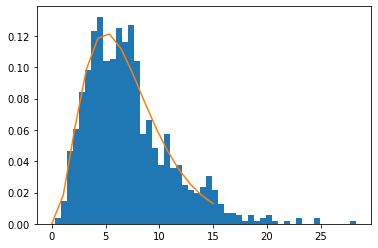

In [37]:
h = plt.hist(chi2_arr, density=True, bins=50)
ndof = len(xdata) - 3  # I have 3 parameters in my model
chi2_sample = np.linspace(0, 15., 15)
chi2pdf = scipy.stats.chi2.pdf(chi2_sample, ndof)
plt.plot(chi2_sample, chi2pdf)

## V. The standard library  <a class="anchor" id="V"></a>
   
This section gives an overview of the very useful modules methods you may need to use at some point to manage your files, directory structures, platform-related file naming conventions, ... 

### `os`: operating system functionality

> “A portable way of using operating system dependent functionality.”

#### Directory and file manipulation:

- Current directory:   `os.getcwd()`    

- List a directory:  `os.listdir(os.curdir)`

- Make a directory:   `os.mkdir('junkdir')`

- Rename the directory:  `os.rename('junkdir', 'foodir')`

- Delete a file:  `os.remove('junk.txt')`


In [38]:
import os
# Experiment with the use of OS and check-out the output
print(os.getcwd())
print(os.listdir(os.curdir))
fp = open('junk.txt', 'w')    # first create an empty file
fp.close()
print('junk.txt' in os.listdir(os.curdir))
os.remove('junk.txt')
print('junk.txt' in os.listdir(os.curdir))

/Users/dsluse/work/git_projects/SPAT0002-1/Ongoing/02-Main_useful_python_modules
['area_w_arguments.py', '.DS_Store', 'Modules_in_python_numpy_adv.ipynb', 'Modules_in__python_numpy-filled.ipynb', 'Matplotlib_illustration_figure.pptx', 'nicefig.pdf', 'Modules_in__python_scipy.ipynb', 'Modules_in__python_filled_test.ipynb', 'Modules_in__python_matplotlib_filled.ipynb', 'area_interact.py', '__pycache__', 'area_2.py~', 'Modules_in__python_matplotlib_2019.ipynb', 'Modules_in__python_filled.ipynb', 'area_interact.py~', 'area_w_arguments.py~', 'Modules_in__python_numpy.ipynb', 'Modules_in_python_numpy_test.ipynb', 'Recap_python_L1.ipynb', 'myfile.txt', '.ipynb_checkpoints', 'Exercises_list_arrays_extra_commands.ipynb', 'Modules_in__python.ipynb', 'area_2.py', 'area.py', 'Matplotlib_illustration_figure.pdf', 'myawesomemodule.py', 'data.txt', 'data_new.txt']
True
False


### os.path: path manipulations

`os.path` provides common operations on pathnames:

- Get the absolute path name for a file in a directory: `a = os.path.abspath('junk.txt')`  
``` python
>>> a
    '/Users/cburns/src/scipy2009/scipy_2009_tutorial/source/junk.txt'
```
- Split Path name and file name:  `os.path.split(a)`   

- Get the path part of `a`:  `os.path.dirname(a)`     

- Filename part of `a`:  `os.path.basename(a)`    
    'junk.txt'

- Split file name into name and extension: `os.path.splitext(os.path.basename(a))`   

- Check existence of a file in a path: `os.path.exists('junk.txt')`   

- Check that a filename corresponds to a file: `os.path.isfile('junk.txt')`   

- Check for a directory name: `os.path.isdir('junk.txt')`    

- Pathname corresponding to home of the user: `os.path.expanduser('~')`     

- Create a string by merging pathnames/strings: `os.path.join(os.path.expanduser('~'), 'local', 'bin')`    


#### Environment variables:

Get environment variable: 

- All defined environment variable:  `os.environ.keys()`   
- Get the path to which corresponds a given env. variable:    
`os.environ['PYTHONPATH']`     
OR    
`os.getenv('PYTHONPATH')`


### `subprocess`: running an external command

This is also very useful to call an externally compiled program.
- Call a simple command, wait for it to finish, and get the return code:

```  python
import subprocess
subprocess.call('chmod +x filename', shell=True)
```

- Communicate with the process (try for example with some_program.f):

``` python
>>> p1 = subprocess.Popen('./some_program',stdout=subprocess.PIPE)
>>> p1.stdout.readline()
>>> p1.send_signal(signal.SIGSTOP)
>>> p1.send_signal(signal.SIGCONT)
>>> p1.send_signal(signal.SIGKILL)
```

**Notes:**

How to communicate with a program during execution:

Suppose we want to run a program, and check its output while it’s running. For this, we need to read the program’s standard output while it is running, wait for the next line to appear, and end the loop when the output stream is closed. This can be done with:
``` python 
def line_at_a_time(fileobj):
    while True:
        line = fileobj.readline()
        if not line:
            return
        yield line
```

Now, we can run the program and check the output. Suppose “myprogram” prints ERROR to the screen when it encountered an error, and we want to kill the program whenever that occurs:
``` python 
>>> p1 = subprocess.Popen('./my_program',stdout=subprocess.PIPE)
>>> for line in line_at_a_time(p1.stdout):
        if "ERROR" in line:
            p1.send_signal(signal.SIGKILL)
```
Similarly, you can use subprocess.PIPE to send data to stdin.


### `sys`: system-specific information

This is particularly useful if you want to make a quick fix to import some python codes located in a specific directory, or to figure out which python is used when you have multiple python installed on the machine ... (these kind of problems can now be more easily avoided if you install python via conda ...). 

System-specific information related to the Python interpreter.

- Which version of python are you running and where is it installed: 
        * Platform: `sys.platform`
        * Version of python: `sys.version`
        * Location of python used: 'sys.prefix`

- List of command line arguments passed to a Python script: `sys.argv`

- The  list of strings that specifies the search path for modules is initialized from PYTHONPATH, and obtained from:   `sys.path` 

## VI. References and supplementary material: <a class="anchor" id="VI"></a>
    
- Standard python library:[http://www.ster.kuleuven.be/~pieterd/python/html/pure_python/standard_library.html](http://www.ster.kuleuven.be/~pieterd/python/html/pure_python/standard_library.html)

- About minimization of functions and finding local/global minima with scipy (topic not covered in this lecture): http://www.scipy-lectures.org/advanced/mathematical_optimization/index.html

- Scipy lecture notes: (from which part of numpy, scipy, matplotlib tutorial are inspired): [http://www.scipy-lectures.org/index.html](http://www.scipy-lectures.org/index.html)  (creative Commons 4.0)
